<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Preprocesamiento y Análisis Exploratorio de Datos (EDA)</h1>
</div>

El **análisis exploratorio de datos (EDA, por sus siglas en inglés)** es el proceso inicial de examinar y resumir un conjunto de datos para comprender su estructura, características principales, patrones, valores atípicos y relaciones entre variables. Se utilizan técnicas estadísticas, visualizaciones y descripciones numéricas para obtener una visión general de los datos antes de aplicar modelos más complejos.



**¿Por qué es importante para la IA?**

- Permite detectar errores, inconsistencias y valores atípicos que pueden afectar el desempeño de los modelos de IA.
- Ayuda a comprender la distribución y relaciones entre variables, lo que facilita la selección de características relevantes.
- Es clave para preparar y limpiar los datos, asegurando que los algoritmos de IA trabajen con información de calidad.
- Facilita la identificación de patrones y tendencias que pueden guiar la elección del modelo o la estrategia de análisis.

Reduce el riesgo de interpretar mal los resultados, ya que proporciona contexto y conocimiento previo sobre los datos.
En resumen, el EDA es una herramienta fundamental para garantizar que los modelos de IA se construyan sobre bases sólidas y produzcan resultados confiables

### ¿Que preguntas hacernos cuando tenemos archivos en crudo?

- ¿Cuántos registros hay?
    - ¿Son demasiado pocos?
    - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
    
- ¿Están todas las filas completas ó tenemos campos con valores nulos?
    - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
    
- ¿Que datos son discretos y cuales continuos?
    - Muchas veces sirve obtener el tipo de datos: texto, int, double, float
    
- Si es un problema de tipo supervisado:
    - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
    - ¿Esta balanceado el conjunto salida?
    
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?

- ¿Siguen alguna distribución?

- ¿Hay correlación entre features (características)?

- En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.

- ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.

- Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?

- ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
    - Podemos eliminarlos? es importante conservarlos?
    - son errores de carga o son reales?
    
- ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)


## Ejemplo

In [20]:
#Importar librerias
import pandas as pd
import numpy as np

In [21]:
df_movie = pd.read_csv('Data/movie_metadata.csv')
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
df_movie.shape #Numero de filas y columnas

(5043, 28)

In [23]:
df_movie.info() #Informacion del conjunto de datos con sus columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Preprocesamiento de Datos

#### Análisis de datos Faltantes

In [24]:
df_movie_clean = df_movie.dropna() #Eliminar los registros que tienen valor NaN
df_movie_clean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [25]:
#DataFrame resultante despues de la eliminación
df_movie_clean.shape 

(3755, 28)

In [26]:
df_movie['duration'] #Columna duration

0       178.0
1       169.0
2       148.0
3       164.0
4         NaN
        ...  
5038     87.0
5039     43.0
5040     76.0
5041    100.0
5042     90.0
Name: duration, Length: 5043, dtype: float64

In [27]:
#fill con la media
df_movie['duration'].fillna(df_movie['duration'].mean(), inplace=True) #Rellenar con la media

In [28]:
df_movie['duration']

0       178.000000
1       169.000000
2       148.000000
3       164.000000
4       107.201074
           ...    
5038     87.000000
5039     43.000000
5040     76.000000
5041    100.000000
5042     90.000000
Name: duration, Length: 5043, dtype: float64

In [29]:
df_movie['color']

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

In [30]:
#fill con una nueva categoria
df_movie['color'].fillna('unk', inplace=True)

In [31]:
df_movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.000000,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.000000,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.000000,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.000000,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,unk,Doug Walker,NaN,107.201074,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.000000,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.000000,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.000000,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.000000,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [16]:
df_movie['genres'].unique() #Generos 

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

#### Limpieza de los datos

In [32]:
#Leer DataFrame
dirty_df = pd.read_csv('Data/dirty_data.csv')
dirty_df.head()

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439


In [33]:
dirty_df.info() #Informacion del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         14 non-null     int64 
 1   birth_date  14 non-null     object
 2   marital     13 non-null     object
 3   people      14 non-null     object
 4   ssn         13 non-null     object
dtypes: int64(1), object(4)
memory usage: 692.0+ bytes


#### Algunas funciones útiles para limpieza de datos

In [34]:
import string

In [35]:
string.punctuation #Signos de puntuación

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
# remover signos de puntuación
def remove_punctuation(x):
    try: #Capturar errores
        #Elemento de entrada, unir todos los caracteres si el caracter no es signo de puntuacion
        x = ''.join(ch for ch in x if ch not in string.punctuation) 
    except:
        print(f'{x} no es una cadena de caracteres')
        pass #Dejar pasar la función, no hara nada
    return x
        

In [37]:
#probando la función
s = 'Alf!onso? A,guilar__'
remove_punctuation(s) #Elimina los signos de puntuación 

'Alfonso Aguilar'

In [38]:
string.digits #Cadena de caracteres de todos los digitos

'0123456789'

In [39]:
#Remover dígitos
def remove_digits(x):
    try:
        x=''.join(ch for ch in x if ch not in string.digits)
    except:
        print(f'{x} no es una cadena de caracteres')
        pass
    return x

In [40]:
#probando la función
s = 'Alf!6ons98o? 1A,guilar__'
remove_digits(s) #Elimina los digitos(numeros)

'Alf!onso? A,guilar__'

In [41]:
#Podemos usar ambas funciones
remove_punctuation(remove_digits(s)) 

'Alfonso Aguilar'

In [42]:
# remover espacios en blanco
def remove_whitespace(x):
    try:
        x=' '.join(x.split()) #split generando las listas de cadenas de caracteres y despues las uno
    except:
        pass
    return x

#Convertir a minisculas
def lower_text(x):
    try:
        x = x.lower()
    except:
        pass
    return x

#Convertir a mayusculas
def upper_text(x):
    try:
        x = x.upper()
    except:
        pass
    return x

# Función que convierta a mayúsculas la primera letra
def capitalize_text(x):
    try:
        x = x.capitalize()
    except:
        pass
    return x
    
# Reemplazar texto
def replace_text(x,to_replace, replacement):
    try:
        x = x.replace(to_replace, replacement)
    except:
        pass
    return x


In [43]:
# Probar en las columnas del dataset
dirty_df['people']

0                     Alfonso A,guilar
1                    edu6ardo Castillo
2                        jocelyn medel
3                   VICTOR ramos _ _ _
4       CARLOS EDUARDO; OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6            JUAN MARIO; OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9     JOSE ALEJANDRO& PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11             JOSE ALFONSO RAMIREZ D.
12             ANA PAULA RANGEL OCHOA&
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [44]:
#Aplicar a cada uno de los registros alguna funcion
dirty_df['people'].apply(remove_punctuation).apply(remove_digits).apply(remove_whitespace).apply(lower_text).apply(capitalize_text)

0                      Alfonso aguilar
1                     Eduardo castillo
2                        Jocelyn medel
3                         Victor ramos
4        Carlos eduardo ochoa arambula
5           Jose manuel ochoa cardenas
6             Juan mario ochoa navarro
7                Luis ontaneda mijares
8          Eduardo omar ortega ramirez
9      Jose alejandro preciado gandara
10    Jose aantonio quintero rodriguez
11              Jose alfonso ramirez d
12              Ana paula rangel ochoa
13                  Arturo ruiz chavez
Name: people, dtype: object

In [45]:
dirty_df['birth_date']

0     02/12/1954
1     05/07/1958
2     01-26-1956
3     19xx-10-23
4     02/12/0054
5     05/07/1958
6     01-26-1956
7     19xx?10-23
8     02/12/1954
9     05/07/1958
10    01-26-1956
11    19xx-10-23
12    02/12/0054
13    05/07/1958
Name: birth_date, dtype: object

In [46]:
dirty_df['birth_date'].apply(replace_text, args=('-','/')).apply(replace_text, args=('?','/')) 
#Args agregar los argumementos de entrada(3 valores)

0     02/12/1954
1     05/07/1958
2     01/26/1956
3     19xx/10/23
4     02/12/0054
5     05/07/1958
6     01/26/1956
7     19xx/10/23
8     02/12/1954
9     05/07/1958
10    01/26/1956
11    19xx/10/23
12    02/12/0054
13    05/07/1958
Name: birth_date, dtype: object

### Practica 2: Agregar las funciones en la librería de clase HyAIA

En la Practica 1 se creo un archivo .py donde se pueda almacenar la clas HyAIA, ahora agrega nuevos métodos para la limpieza

In [47]:
from HyAIA import HyAIA as hia

In [48]:
df_dir = hia(dirty_df)

In [49]:
df_dir.data_categoricos

,birth_date,marital,people,ssn
0,02/12/1954,soltero,"Alfonso A,guilar",6439
1,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439
5,05/07/1958,CASado,JOSE MANUEL OCHOA CARDENAS,689 24 9939
6,01-26-1956,Soltero,JUAN MARIO; OCHOA NAVARRO,306-05-2792
7,19xx?10-23,DIVORCIADO,LUIS ONTANEDA MIJARES,99922a45832
8,02/12/1954,soltero,EDUARDO OMAR ORTEGA RAMIREZ,NaN
9,05/07/1958,NaN,JOSE ALEJANDRO& PRECIADO GANDARA,6439


In [50]:
#Usar el metodo estático
df_dir.remove_punctuation('CARLOS EDUARDO; OCHOA ARAMBULA') #Recibe "x" que es la cadena de caracteres y da como resultado la misma

'CARLOS EDUARDO OCHOA ARAMBULA'

In [51]:
#Usar el metodo estático
hia.remove_digits('edu6ardo Castillo')

'eduardo Castillo'

In [52]:
dirty_df['people'].apply(df_dir.remove_punctuation)

0                      Alfonso Aguilar
1                    edu6ardo Castillo
2                        jocelyn medel
3                      VICTOR ramos   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

## Reporte de Calidad de Datos

Un **reporte de calidad de datos** es un documento o análisis que evalúa el estado y las características de un conjunto de datos antes de su uso en proyectos analíticos o de inteligencia artificial. Este reporte identifica problemas, inconsistencias y riesgos asociados a los datos, ayudando a tomar decisiones sobre limpieza, transformación y uso adecuado.

**Aspectos que suele incluir:**

- Valores faltantes: Cantidad y porcentaje de datos ausentes por columna
- Valores presentes: Cantidad y porcentaje de datos presentes por columna
- Duplicados (Registros repetidos en el dataset).
- Tipos de datos: Verificación de formatos (numérico, texto, fecha, etc.).
- Distribución de variables: Estadísticas descriptivas (media, mediana, moda, etc.).
- Valores atípicos: Detección de datos fuera de rango o inusuales.
- Errores de formato: Problemas en fechas, números, codificación, etc.

Un reporte de calidad de datos permite detectar y corregir problemas antes de entrenar modelos de IA, asegurando resultados más confiables y evitando sesgos o errores en el análisis.

En este apartado crearemos nuestros reportes de calidad de datos

In [53]:
#Dataset de paises
df_countries = pd.read_csv('Data/countries.csv', sep=';')

In [54]:
df_countries.head() #Primeros 5 registros

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [55]:
def dqr(data):
    
    #% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values), columns=['Columns_Names'], 
                           index=list(data.columns.values))
    
    #Lista de tipos de datos del dataframe
    data_dtypes = pd.DataFrame(data.dtypes, columns=['Dtypes'])
    
    #Lista de valores presentes
    present_values = pd.DataFrame(data.count(), columns=['Present_values']) #Count conteo de los registos con valor
    
    #Lista de valores missing (Valores faltantes/nulos nan)
    missing_values = pd.DataFrame(data.isnull().sum(), columns=['Missing_values'])
    
    #Valores unicos de las columnas
    unique_values = pd.DataFrame(columns=['Unique_values'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]
    
    # Información estadística
    #Lista de valores máximos
    max_values = pd.DataFrame(columns=['Max_values'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            max_values.loc[col] = ['N/A']
        pass
            
    #Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Min_values'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            min_values.loc[col] = ['N/A']
        pass
        
    #Lista de valores con su desviación estandar
    std_values = pd.DataFrame(columns=['Std_values'])
    for col in list(data.columns.values):
        try:
            std_values.loc[col] = [data[col].std()]
        except:
            std_values.loc[col] = ['N/A']
        pass   
        
    #Lista de valores con los percentiles
    
    p25_values = pd.DataFrame(columns=['P25'])
    p50_values = pd.DataFrame(columns=['P50_Median'])
    p75_values = pd.DataFrame(columns=['P75'])

    for col in list(data.columns.values):
        try:
            p25_values.loc[col] = [data[col].quantile(0.25)]
            p50_values.loc[col] = [data[col].quantile(0.50)]
            p75_values.loc[col] = [data[col].quantile(0.75)]
        except:
            p25_values.loc[col] = ['N/A']
            p50_values.loc[col] = ['N/A']
            p75_values.loc[col] = ['N/A']
        pass
        
    #Lista de valores con la media
    mean_values = pd.DataFrame(columns=['Mean_values'])
    for col in list(data.columns.values):
        try:
            mean_values.loc[col] = [data[col].mean()]
        except:
            mean_values.loc[col] = ['N/A']
        pass
       
    return columns.join(data_dtypes).join(present_values).join(missing_values).join(unique_values).join(max_values).join(min_values).join(mean_values).join(p25_values).join(p50_values).join(p75_values).join(std_values)

In [56]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [57]:
dqr(df_countries)

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,P25,P50_Median,P75,Std_values
alpha_2,alpha_2,object,251,1,251,N/A,N/A,N/A,N/A,N/A,N/A,N/A
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,N/A,N/A,N/A,N/A,N/A
area,area,float64,252,0,248,17100000.0,0.0,595287.855913,1098.0,64894.5,362224.5,1904817.772759
capital,capital,object,246,6,244,N/A,N/A,N/A,N/A,N/A,N/A,N/A
continent,continent,object,210,42,6,N/A,N/A,N/A,N/A,N/A,N/A,N/A
currency_code,currency_code,object,251,1,155,N/A,N/A,N/A,N/A,N/A,N/A,N/A
currency_name,currency_name,object,251,1,82,N/A,N/A,N/A,N/A,N/A,N/A,N/A
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,N/A,N/A,N/A,N/A,N/A,N/A,N/A
fips,fips,object,249,3,249,N/A,N/A,N/A,N/A,N/A,N/A,N/A
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2427869.984127,1163774.5,2367967.0,3478296.25,1632092.92473


In [ ]:
class HyAIA:
    def __init__(self, df):
        self.data = df
        self.columns = df.columns
        self.dqr = self.get_dqr()

    def dqr(self):
        """
        Método para un reporte de calidad de datos
        """
        return None

In [58]:
df_coun = hia(df_countries)

In [59]:
df_coun.df_dqr

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Is_categorical,Max_values,Min_values,Mean_values,25%,50%,75%,Std_values,Categories
alpha_2,alpha_2,object,251,1,251,True,False,False,False,N/A,N/A,N/A,False,N/A
alpha_3,alpha_3,object,252,0,252,True,False,False,False,N/A,N/A,N/A,False,N/A
area,area,float64,252,0,248,False,17100000.0,0.0,595287.855913,1098.0,64894.5,362224.5,1904817.772759,N/A
capital,capital,object,246,6,244,True,False,False,False,N/A,N/A,N/A,False,N/A
continent,continent,object,210,42,6,True,False,False,False,N/A,N/A,N/A,False,"EU, AS, AF, AN, SA, OC"
currency_code,currency_code,object,251,1,155,True,False,False,False,N/A,N/A,N/A,False,N/A
currency_name,currency_name,object,251,1,82,True,False,False,False,N/A,N/A,N/A,False,N/A
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,True,False,False,False,N/A,N/A,N/A,False,FI
fips,fips,object,249,3,249,True,False,False,False,N/A,N/A,N/A,False,N/A
geoname_id,geoname_id,int64,252,0,252,False,8505033,49518,2427869.984127,1163774.5,2367967.0,3478296.25,1632092.92473,N/A


In [60]:
df_countries

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [61]:
df_countries['capital'].nunique() #Unicos (CApital valor categorico)

244

In [62]:
df_countries['continent'].unique() #Mostrar los valores unicos de Capital

array(['EU', 'AS', nan, 'AF', 'AN', 'SA', 'OC'], dtype=object)

## Tarea 1: Modificación de la librería de clase

Tomando en cuenta la libreria creada en clase HyAIA, y la función de reporte de calidad de datos `dqr()`, realizar lo siguiente:

Modificar la función dqr() para tener lo siguiente:

>1.- Modificar la función dqr() para que en el reporte se agregue una columna que sea booleana boolena para representar si una columna es categórica ('Is_categorical') ('Is_categorical' True-->col categorica, False ---> numérica)

>2.- Modificar la función dqr() para que en el reporte se agregue una columna con las categorías de las columnas (valores unicos) que resulten ser categóricas (si las categorias > 10, no agregar esas categorias)

>3.- Aplicar el análisis estadístico de las columnas creadas (max, min, mean, std) solo para las columnas que sean numéricas ('Is_categorical' == False)


### EDA utilizando el reporte de calidad de datos

In [63]:
hy_countries = hia(df_countries)

In [64]:
#Dataframe a analisar
hy_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [68]:
# reporte de calidad de datos
hy_countries.df_dqr

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Is_categorical,Max_values,Min_values,Mean_values,25%,50%,75%,Std_values,Categories
alpha_2,alpha_2,object,251,1,251,True,False,False,False,N/A,N/A,N/A,False,N/A
alpha_3,alpha_3,object,252,0,252,True,False,False,False,N/A,N/A,N/A,False,N/A
area,area,float64,252,0,248,False,17100000.0,0.0,595287.855913,1098.0,64894.5,362224.5,1904817.772759,N/A
capital,capital,object,246,6,244,True,False,False,False,N/A,N/A,N/A,False,N/A
continent,continent,object,210,42,6,True,False,False,False,N/A,N/A,N/A,False,"EU, AS, AF, AN, SA, OC"
currency_code,currency_code,object,251,1,155,True,False,False,False,N/A,N/A,N/A,False,N/A
currency_name,currency_name,object,251,1,82,True,False,False,False,N/A,N/A,N/A,False,N/A
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,True,False,False,False,N/A,N/A,N/A,False,FI
fips,fips,object,249,3,249,True,False,False,False,N/A,N/A,N/A,False,N/A
geoname_id,geoname_id,int64,252,0,252,False,8505033,49518,2427869.984127,1163774.5,2367967.0,3478296.25,1632092.92473,N/A


In [66]:
from HyAIA import HyAIA as hy

In [67]:
hy_countries = hy(df_countries)

In [69]:
#columnas categoricas
hy_countries.categoricos_columns

['alpha_2',
 'alpha_3',
 'capital',
 'continent',
 'currency_code',
 'currency_name',
 'fips',
 'languages',
 'name',
 'neighbours',
 'phone',
 'postal_code_format',
 'postal_code_regex',
 'tld']

In [70]:
# Limpieza de datos:rellenar columnas categoricas con etiqueta ('unk') representando una nueva categoría 
for col_cat in hy_countries.categoricos_columns:
    hy_countries.data[col_cat].fillna('unk', inplace=True)
    

C:\Users\Lili\AppData\Local\Temp\ipykernel_9728\1485720974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hy_countries.data[col_cat].fillna('unk', inplace=True)


In [71]:
# Obtener nuevamente el reporte de calidad de datos
hy_countries.dqr = hy_countries.get_dqr()
hy_countries.dqr

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Is_categorical,Max_values,Min_values,Mean_values,25%,50%,75%,Std_values,Categories
alpha_2,alpha_2,object,252,0,252,True,False,False,False,N/A,N/A,N/A,False,N/A
alpha_3,alpha_3,object,252,0,252,True,False,False,False,N/A,N/A,N/A,False,N/A
area,area,float64,252,0,248,False,17100000.0,0.0,595287.855913,1098.0,64894.5,362224.5,1904817.772759,N/A
capital,capital,object,252,0,245,True,False,False,False,N/A,N/A,N/A,False,N/A
continent,continent,object,252,0,7,True,False,False,False,N/A,N/A,N/A,False,"EU, AS, unk, AF, AN, SA, OC"
currency_code,currency_code,object,252,0,156,True,False,False,False,N/A,N/A,N/A,False,N/A
currency_name,currency_name,object,252,0,83,True,False,False,False,N/A,N/A,N/A,False,N/A
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,True,False,False,False,N/A,N/A,N/A,False,FI
fips,fips,object,252,0,250,True,False,False,False,N/A,N/A,N/A,False,N/A
geoname_id,geoname_id,int64,252,0,252,False,8505033,49518,2427869.984127,1163774.5,2367967.0,3478296.25,1632092.92473,N/A


In [72]:
#eliminar la columna con mayor numero de valores faltantes
hy_countries.data.drop('eqivalent_fips_code', axis=1, inplace=True)

In [73]:
hy_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,unk,unk,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,unk,unk,.af
3,AG,ATG,443.0,St. John's,unk,XCD,Dollar,AC,3576396,en-AG,Antigua and Barbuda,unk,28,+1-268,86754,unk,unk,.ag
4,AI,AIA,102.0,The Valley,unk,XCD,Dollar,AV,3573511,en-AI,Anguilla,unk,660,+1-264,13254,unk,unk,.ai


### Iniciando el análisis

In [74]:
# alpha_3 representa el tag del país
hy_countries.data[hy_countries.data['alpha_3']=='MEX']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
157,MX,MEX,1972550.0,Mexico City,unk,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx


In [75]:
#Cuáles son las lenguas de los países?
hy_countries.data['languages'].unique()

array(['ca', 'ar-AE,fa,en,hi,ur', 'fa-AF,ps,uz-AF,tk', 'en-AG', 'en-AI',
       'sq,el', 'hy', 'pt-AO', 'unk', 'es-AR,en,it,de,fr,gn',
       'en-AS,sm,to', 'de-AT,hr,hu,sl', 'en-AU', 'nl-AW,es,en', 'sv-AX',
       'az,ru,hy', 'bs,hr-BA,sr-BA', 'en-BB', 'bn-BD,en',
       'nl-BE,fr-BE,de-BE', 'fr-BF', 'bg,tr-BG,rom', 'ar-BH,en,fa,ur',
       'fr-BI,rn', 'fr-BJ', 'fr', 'en-BM,pt', 'ms-BN,en-BN',
       'es-BO,qu,ay', 'nl,pap,en', 'pt-BR,es,en,fr', 'en-BS', 'dz',
       'en-BW,tn-BW', 'be,ru', 'en-BZ,es', 'en-CA,fr-CA,iu', 'ms-CC,en',
       'fr-CD,ln,kg', 'fr-CF,sg,ln,kg', 'fr-CG,kg,ln-CG',
       'de-CH,fr-CH,it-CH,rm', 'fr-CI', 'en-CK,mi', 'es-CL',
       'en-CM,fr-CM', 'zh-CN,yue,wuu,dta,ug,za', 'es-CO', 'es-CR,en',
       'es-CU', 'pt-CV', 'nl,pap', 'en,zh,ms-CC', 'el-CY,tr-CY,en',
       'cs,sk', 'de', 'fr-DJ,ar,so-DJ,aa', 'da-DK,en,fo,de-DK', 'en-DM',
       'es-DO', 'ar-DZ', 'es-EC', 'et,ru', 'ar-EG,en,fr', 'ar,mey',
       'aa-ER,ar,tig,kun,ti-ER', 'es-ES,ca,gl,eu,oc',
       'a

In [76]:
#Buscar cuales son los países con lengua español en el dataset
df_countries_es = hy_countries.data[hy_countries.data['languages'].str.contains('es')] #Si contiene es (contains)
df_countries_es.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,unk,AWG,Guilder,AA,3577279,"nl-AW,es,en",Aruba,unk,533,297,71566,unk,unk,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,unk,unk,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,unk,BZD,Dollar,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,unk,unk,.bz


In [77]:
df_countries_es.shape

(29, 18)

In [78]:
df_countries_es_10 = df_countries_es.sort_values(by='population', ascending=False).head(10)

<Axes: xlabel='alpha_3'>

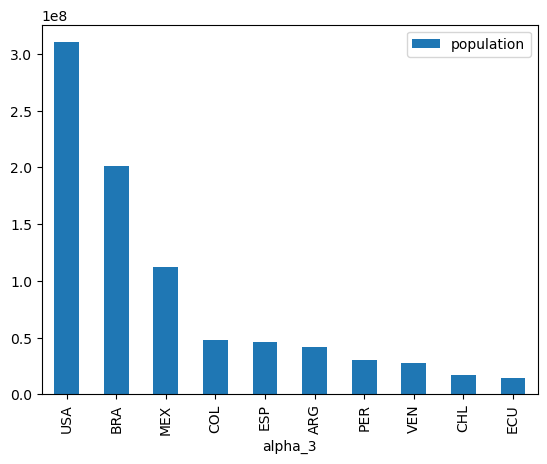

In [79]:
# Obtener el top 10 de países con mayor población que hablan Español
df_countries_es_10.set_index('alpha_3')[['population']].plot(kind='bar')

<Axes: xlabel='alpha_3'>

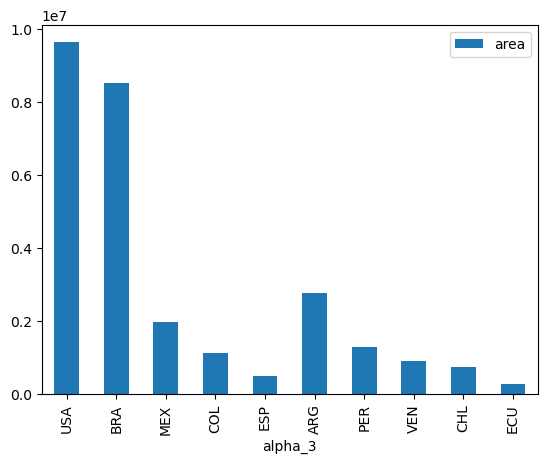

In [80]:
#Obtener el top 10 de paises con mayor superficie con habla en español
df_countries_es_10.set_index('alpha_3')[['area']].plot(kind='bar')

In [81]:
#Cuáles son los países con area mayor a 200000?
df_countries_20 = hy_countries.data[hy_countries.data['area']>200000]
df_countries_20.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,unk,unk,.af
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,unk,unk,.ao
8,AQ,ATA,14000000.0,unk,AN,unk,unk,AY,6697173,unk,Antarctica,unk,10,unk,0,unk,unk,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
12,AU,AUS,7686850.0,Canberra,OC,AUD,Dollar,AS,2077456,en-AU,Australia,unk,36,61,21515754,####,^(\d{4})$,.au


<Axes: xlabel='alpha_3'>

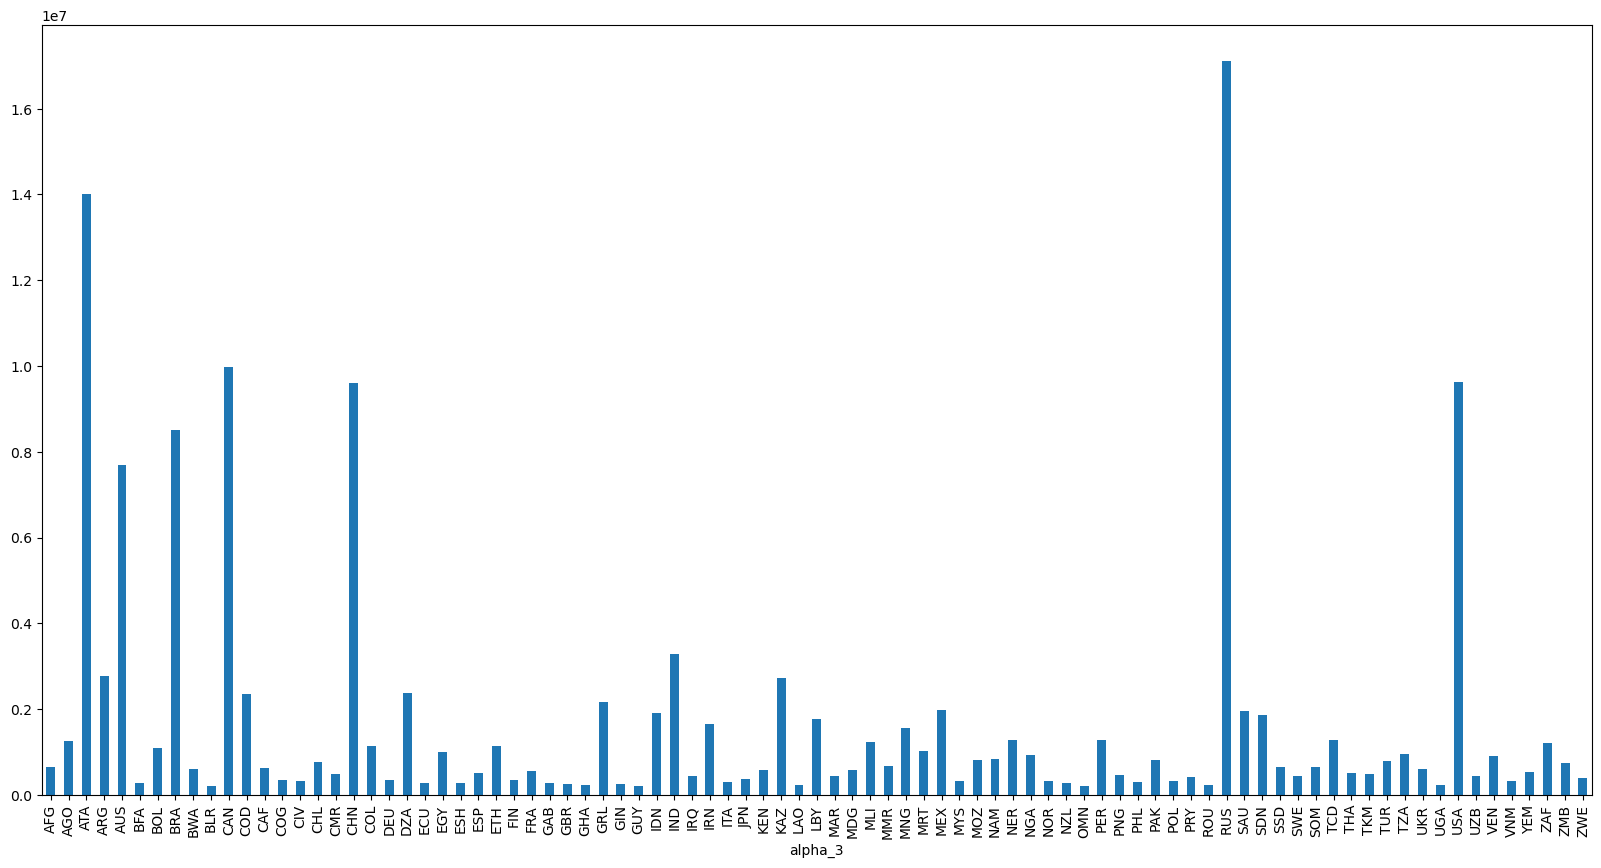

In [82]:
#Gráfico de los 20 países con mayor superficie
df_countries_20.set_index('alpha_3')['area'].plot(kind='bar', figsize=(20,10))

In [83]:
df_countries_es[df_countries_es['alpha_3']=='VEN']


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
238,VE,VEN,912050.0,Caracas,SA,VEF,Bolivar,VE,3625428,es-VE,Venezuela,"GY,BR,CO",862,58,27223228,####,^(\d{4})$,.ve


In [85]:
# Paises que tienen frontera con Mexico?
df_countries_es[df_countries_es['neighbours'].str.contains('MX')]


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
36,BZ,BLZ,22966.0,Belmopan,unk,BZD,Dollar,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,unk,unk,.bz
90,GT,GTM,108890.0,Guatemala City,unk,GTQ,Quetzal,GT,3595528,es-GT,Guatemala,"MX,HN,BZ,SV",320,502,13550440,#####,^(\d{5})$,.gt
233,US,USA,9629091.0,Washington,unk,USD,Dollar,US,6252001,"en-US,es-US,haw,fr",United States,"CA,MX,CU",840,1,310232863,#####-####,^\d{5}(-\d{4})?$,.us


In [ ]:
# Paises que tienen frontera con Colombia, Venezuela, Brazil, Argentina?

## Práctica 3

1. ¿cuáles son los países que tienen como currency name == Peso?
2. ¿cuáles son los 5 países más grandes (área) que tienen como currency name == Peso ?
3. ¿cuáles son los 5 países más grandes (en población) que tienen como currency name == Peso ?
4. ¿Cuáles son los países y currency code, con currency name== Peso?

In [86]:
df_countries_es.groupby('currency_name')['name'].value_counts()

currency_name  name                
Balboa         Panama                  1
Bolivar        Venezuela               1
Boliviano      Bolivia                 1
Colon          Costa Rica              1
Cordoba        Nicaragua               1
Dollar         Belize                  1
               Ecuador                 1
               El Salvador             1
               Puerto Rico             1
               Trinidad and Tobago     1
               United States           1
Euro           Spain                   1
Franc          Equatorial Guinea       1
Guarani        Paraguay                1
Guilder        Aruba                   1
               Netherlands Antilles    1
Lempira        Honduras                1
Peso           Argentina               1
               Chile                   1
               Colombia                1
               Cuba                    1
               Dominican Republic      1
               Mexico                  1
               Urugua

In [87]:
#1.-

df_countries_es_peso =df_countries_es[df_countries_es['currency_name']=='Peso']
df_countries_es_peso

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,unk,unk,.co
50,CU,CUB,110860.0,Havana,unk,CUP,Peso,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,unk,DOP,Peso,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do
157,MX,MEX,1972550.0,Mexico City,unk,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx
234,UY,URY,176220.0,Montevideo,SA,UYU,Peso,UY,3439705,es-UY,Uruguay,"BR,AR",858,598,3477000,#####,^(\d{5})$,.uy


In [90]:
#2.- 
df_countries_es_peso.set_index('alpha_3')
sort_values(by='area', ascending=False)['area'].plot(kind='bar', figsize=(20,10))


NameError: name 'short_values' is not defined

In [91]:
# Cuáles son los países que tienen más de 5 paises con frontera
hy_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,unk,unk,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,unk,unk,.af
3,AG,ATG,443.0,St. John's,unk,XCD,Dollar,AC,3576396,en-AG,Antigua and Barbuda,unk,28,+1-268,86754,unk,unk,.ag
4,AI,AIA,102.0,The Valley,unk,XCD,Dollar,AV,3573511,en-AI,Anguilla,unk,660,+1-264,13254,unk,unk,.ai


In [92]:
str_paises = 'ES,FR'.split(',')

In [93]:
len(str_paises)

2

In [94]:
def conteo_frontera(x):
    str_x=[]
    try:
        str_x = x.split(',')
    except:
        pass
    return len(str_x)


In [95]:
hy_countries_front = hy_countries.data.set_index('name')['neighbours'].apply(conteo_frontera)
hy_countries_front

name
Andorra                  2
United Arab Emirates     2
Afghanistan              6
Antigua and Barbuda      1
Anguilla                 1
                        ..
South Africa             6
Zambia                   7
Zimbabwe                 4
Serbia and Montenegro    7
Netherlands Antilles     1
Name: neighbours, Length: 252, dtype: int64

<Axes: xlabel='name'>

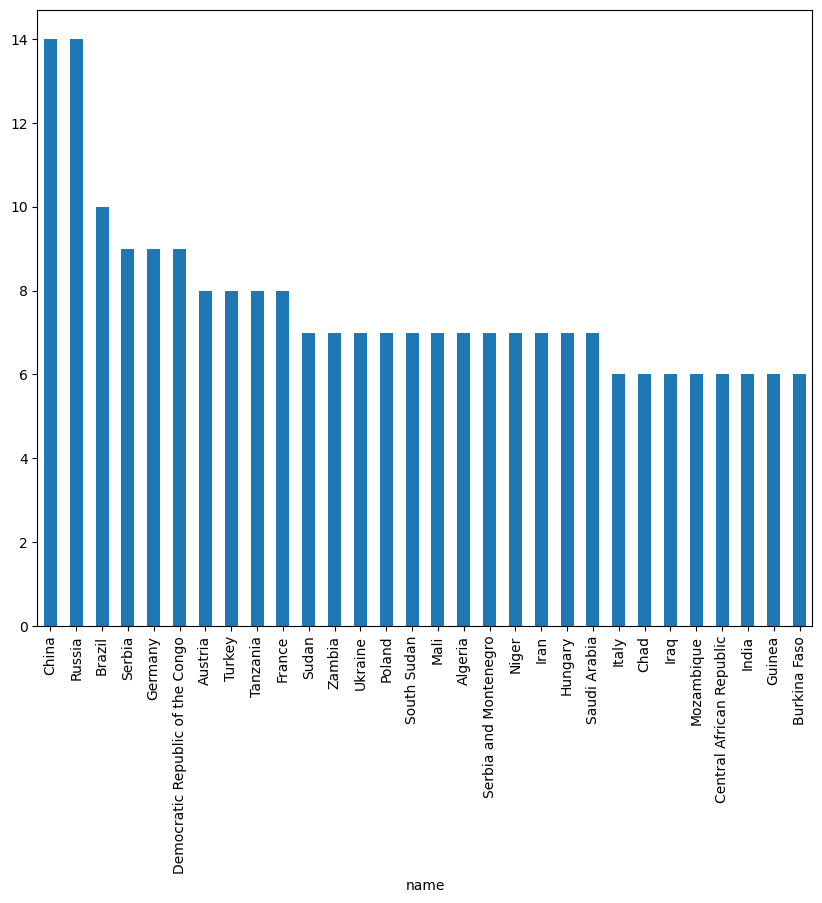

In [96]:
hy_countries_front.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(10,8))